In [1]:
# Import necessary libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.feature import graycomatrix
from skimage import filters, exposure
from pathlib import Path
from collections import Counter
import tensorflow as tf
import random
import os
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
IMAGE_PATH = Path("SB-FishDisease")

image_path_list_jpg = list(IMAGE_PATH.glob("*/*.jpg"))
image_path_list_jpeg = list(IMAGE_PATH.glob("*/*.jpeg"))
image_path_list_png = list(IMAGE_PATH.glob("*/*.png"))
image_path_list_JPG = list(IMAGE_PATH.glob("*/*.JPG"))
image_path_list_webp = list(IMAGE_PATH.glob("*/*.webp"))

TOTAL_IMAGE_PATH_LIST = image_path_list_jpg + image_path_list_jpeg + image_path_list_png\
                        + image_path_list_JPG + image_path_list_webp

print(f'Total Images = {len(TOTAL_IMAGE_PATH_LIST)}')

Total Images = 454


In [4]:
# Let's visualize how many classes we have.
classes = sorted(os.listdir(IMAGE_PATH))
classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

In [5]:
# Let's see how many images per class we have.
class_count = []
for i in TOTAL_IMAGE_PATH_LIST:
    class_count.append(i.parent.stem)

Counter(class_count)

Counter({'Healthy Fish': 110,
         'Bacterial diseases - Aeromoniasis': 77,
         'Bacterial Red disease': 68,
         'Bacterial gill disease': 58,
         'Viral diseases White tail disease': 55,
         'Parasitic diseases': 48,
         'Fungal diseases Saprolegniasis': 38})

C:\Users\skill\AppData\Local\Temp\ipykernel_12744\989893613.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


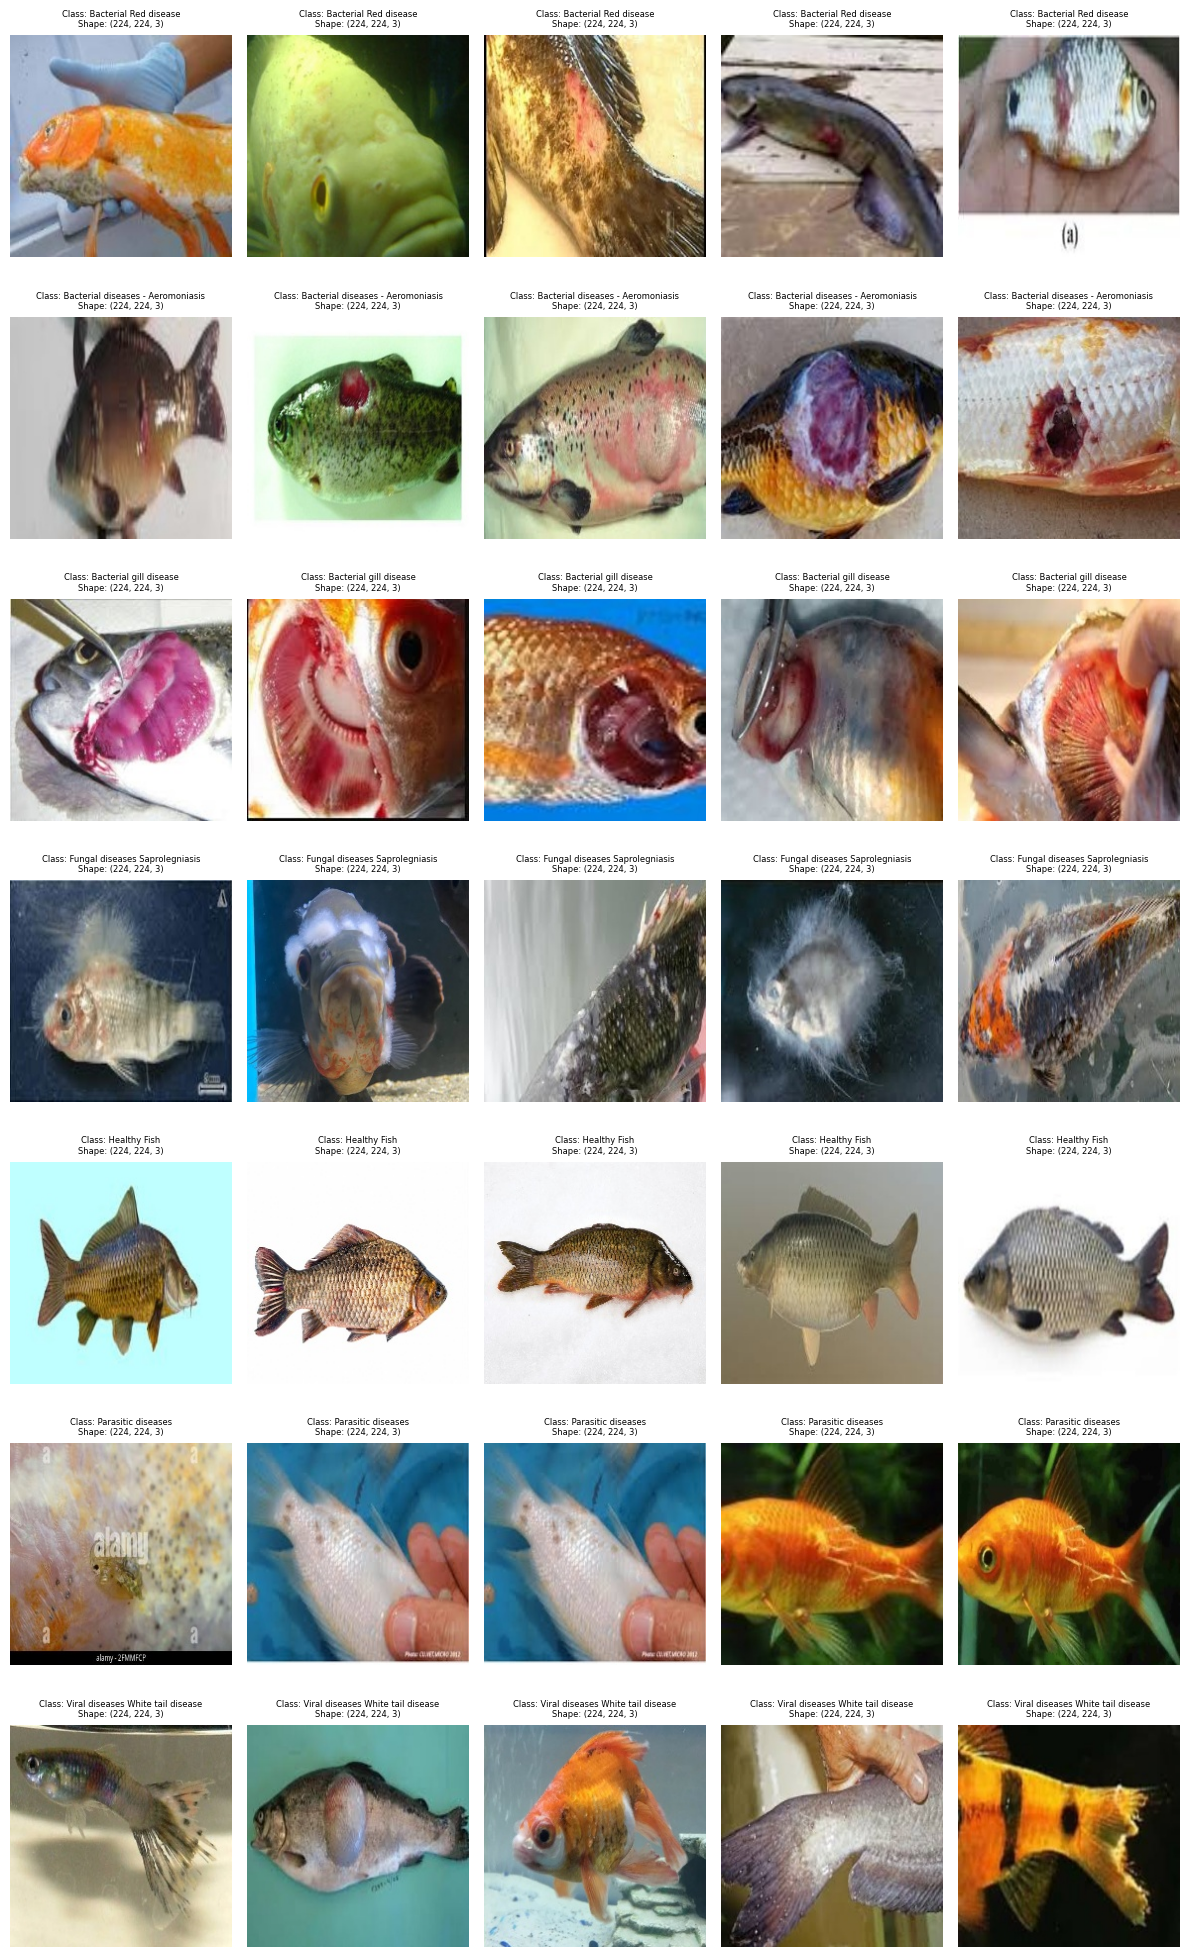

In [6]:
# Let's visualize 5 images for each class.

fig,ax = plt.subplots(nrows = 7, ncols = 5, figsize = (12,20))
p = 0
for c in classes:
    
    a = random.choices(list(Path(os.path.join(IMAGE_PATH, c)).glob("*.jpg")), k = 5)
    
    for i,j in enumerate(a):
        img_BGR = cv2.imread(str(j))
        img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
        ax[p,i].imshow(img_RGB)
        ax[p,i].set_title(f'Class: {j.parent.stem}\nShape: {img_RGB.shape}', fontsize = 6)
        ax[p,i].axis('off')
    p += 1
        
fig.tight_layout()
fig.show()

In [13]:
df_height_width = pd.DataFrame({'height':seq_height, 'width':seq_width})

df_height_width.describe().T

,count,mean,std,min,25%,50%,75%,max
height,454.0,223.112335,10.952362,80.0,224.0,224.0,224.0,224.0
width,454.0,224.000000,0.000000,224.0,224.0,224.0,224.0,224.0


In [14]:
# Let's create our pd.DataFrame to store the path of the images and their respective label.
img_path_and_label = {'img_path':[], 
                      'label':[]}

for img_pth in TOTAL_IMAGE_PATH_LIST:
    img_path_and_label['img_path'].append(img_pth)
    img_path_and_label['label'].append(img_pth.parent.stem)
    
df_path_and_label = pd.DataFrame(img_path_and_label)
df_path_and_label

,img_path,label
0,SB-FishDisease\Bacterial diseases - Aeromonias...,Bacterial diseases - Aeromoniasis
1,SB-FishDisease\Bacterial diseases - Aeromonias...,Bacterial diseases - Aeromoniasis
2,SB-FishDisease\Bacterial diseases - Aeromonias...,Bacterial diseases - Aeromoniasis
3,SB-FishDisease\Bacterial diseases - Aeromonias...,Bacterial diseases - Aeromoniasis
4,SB-FishDisease\Bacterial diseases - Aeromonias...,Bacterial diseases - Aeromoniasis
...,...,...
449,SB-FishDisease\Viral diseases White tail disea...,Viral diseases White tail disease
450,SB-FishDisease\Viral diseases White tail disea...,Viral diseases White tail disease
451,SB-FishDisease\Viral diseases White tail disea...,Viral diseases White tail disease
452,SB-FishDisease\Viral diseases White tail disea...,Viral diseases White tail disease


In [10]:
def extract_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = greycomatrix(gray_image, [1], [0], symmetric=True, normed=True)
    return glcm.flatten()

In [16]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [17]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [11]:
# Now we are going to separate the paths of the images and their respective label.
X = df_path_and_label.drop('label', axis = 1)
y = df_path_and_label['label']

# Then, let's split into training and test set.
# But first we define the random seed for reproducibility.
SEED = 42

X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.2, random_state = SEED, stratify = y)

In [15]:
X_train_features = np.array([extract_features(image) for image in df_path_and_label])
X_test_features = np.array([extract_features(image) for image in df_path_and_label])

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [ ]:
print('Total Images of training set:')
print(Counter(y_train))
print('')

print('Total Images of test set:')
print(Counter(y_test))

In [ ]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_features, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_features)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")